In [1]:
## imports 
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import pandas as pd
import csv

In [2]:
from bs4 import BeautifulSoup
import requests
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
all_sentences = []
with open('Data/personification.txt','r',encoding='utf-8') as f:
    all_sentences = f.readlines()
# all_sentences += df['s'].tolist()

In [4]:
len(all_sentences)

1086

In [5]:
reverse_lines = []
for string in all_sentences:
    s = string.split()[::-1]
    l = []
    for i in s:
        l.append(i)
    if(len(l) > 4):
        reverse_lines.append(" ".join(l))
with open("Data/al_rev.txt",'w', encoding='utf-8') as f:
    for line in reverse_lines:
            f.write(line + '\n')

In [7]:
with open('Data/al_rev.txt','r',encoding="utf8") as story:
  story_data = story.read()

print(story_data)

deaf. times, at and, blind is Justice
on. count can I that friend only the is Money
land. scorched the travel to enough brave visitor any saluted cactus The
system. digestive her to posed it arguments the despite hotdog the ate Jan
stories. sad your hear to care not does world The
factory. the of doldrums the to return never could she kiss, sweet freedom’s After
name. her calling refrigerator the in cheesecake of piece last the heard Peggy
cough. death its wheezed engine sorry The
alive. leave him let wouldn’t they and place this into him dragged Drugs
here. around impatient be can buses The
dinner. your eat to enough hungry always are casinos These
moonlight. the to song lonely a sang He
dark. the in danced flame candle The
duty. for reported raindrops and grumbled Thunder
day. the face to over turned moon The
white. wearing themselves found trees the winter, to turned fall As
water. for begging was grass brown The
leaders. strong needs society Our
day. the in away wasted icicle unhap

Cleaning Process 

In [8]:
import re                                

# Regular expressions to use sub function for replacing the useless text from the data

def clean_text(text):
  text = re.sub(r',', '', text)
  text = re.sub(r'\'', '',  text)
  text = re.sub(r'\"', '', text)
  text = re.sub(r'\(', '', text)
  text = re.sub(r'\)', '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'“', '', text)
  text = re.sub(r'”', '', text)
  text = re.sub(r'’', '', text)
  text = re.sub(r'\.', '', text)
  text = re.sub(r';', '', text)
  text = re.sub(r':', '', text)
  text = re.sub(r'\-', '', text)

  return text

In [9]:
lower_data = story_data.lower()
split_data = lower_data.splitlines()     
# Splitting the data to get every line seperately but this will give the list of uncleaned data

# print(split_data[0])                         

final = ''                               
# initiating a argument with blank string to hold the values of final cleaned data

for line in split_data:
  line = clean_text(line)
  final += '\n' + line

# print(final)
final_data = final.split('\n')       # splitting again to get list of cleaned and splitted data ready to be processed
print(final_data)

['', 'deaf times at and blind is justice', 'on count can i that friend only the is money', 'land scorched the travel to enough brave visitor any saluted cactus the', 'system digestive her to posed it arguments the despite hotdog the ate jan', 'stories sad your hear to care not does world the', 'factory the of doldrums the to return never could she kiss sweet freedoms after', 'name her calling refrigerator the in cheesecake of piece last the heard peggy', 'cough death its wheezed engine sorry the', 'alive leave him let wouldnt they and place this into him dragged drugs', 'here around impatient be can buses the', 'dinner your eat to enough hungry always are casinos these', 'moonlight the to song lonely a sang he', 'dark the in danced flame candle the', 'duty for reported raindrops and grumbled thunder', 'day the face to over turned moon the', 'white wearing themselves found trees the winter to turned fall as', 'water for begging was grass brown the', 'leaders strong needs society our', '

In [10]:
max_vocab = 1000000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(final_data)

# Getting the total number of words of the data.
word2idx = tokenizer.word_index
print(len(word2idx))
print(word2idx)
vocab_size = len(word2idx) + 1        # Adding 1 to the vocab_size because the index starts from 1 not 0. This will make it uniform when using it further
print(vocab_size)

2411
{'the': 1, 'a': 2, 'like': 3, 'of': 4, 'in': 5, 'to': 6, 'and': 7, 'was': 8, 'me': 9, 'can': 10, 'my': 11, 'its': 12, 'with': 13, 'on': 14, 'is': 15, 'be': 16, 'that': 17, 'as': 18, 'sky': 19, 'it': 20, 'danced': 21, 'wind': 22, 'for': 23, 'from': 24, 'at': 25, 'out': 26, 'us': 27, 'through': 28, 'sun': 29, 'i': 30, 'her': 31, 'over': 32, 'up': 33, 'down': 34, 'their': 35, 'clouds': 36, 'change': 37, 'world': 38, 'were': 39, 'whispered': 40, 'trees': 41, 'time': 42, 'life': 43, 'each': 44, 'an': 45, 'stars': 46, 'own': 47, 'leaves': 48, 'waves': 49, 'moon': 50, 'night': 51, 'always': 52, 'water': 53, 'across': 54, 'our': 55, 'you': 56, 'secrets': 57, 'flowers': 58, 'new': 59, 'earth': 60, 'into': 61, 'crept': 62, 'smiled': 63, 'around': 64, 'one': 65, 'river': 66, 'his': 67, 'city': 68, 'breeze': 69, 'all': 70, 'sense': 71, 'mind': 72, 'not': 73, 'she': 74, 'storm': 75, 'fire': 76, 'against': 77, 'if': 78, 'force': 79, 'sang': 80, 'thunder': 81, 'them': 82, 'have': 83, 'had': 84, 

In [13]:
max_vocab = 1000000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(final_data)

# Getting the total number of words of the data.
word2idx = tokenizer.word_index
print(len(word2idx))
print(word2idx)
vocab_size = len(word2idx) + 1        # Adding 1 to the vocab_size because the index starts from 1 not 0. This will make it uniform when using it further
print(vocab_size)

2411
{'the': 1, 'a': 2, 'like': 3, 'of': 4, 'in': 5, 'to': 6, 'and': 7, 'was': 8, 'me': 9, 'can': 10, 'my': 11, 'its': 12, 'with': 13, 'on': 14, 'is': 15, 'be': 16, 'that': 17, 'as': 18, 'sky': 19, 'it': 20, 'danced': 21, 'wind': 22, 'for': 23, 'from': 24, 'at': 25, 'out': 26, 'us': 27, 'through': 28, 'sun': 29, 'i': 30, 'her': 31, 'over': 32, 'up': 33, 'down': 34, 'their': 35, 'clouds': 36, 'change': 37, 'world': 38, 'were': 39, 'whispered': 40, 'trees': 41, 'time': 42, 'life': 43, 'each': 44, 'an': 45, 'stars': 46, 'own': 47, 'leaves': 48, 'waves': 49, 'moon': 50, 'night': 51, 'always': 52, 'water': 53, 'across': 54, 'our': 55, 'you': 56, 'secrets': 57, 'flowers': 58, 'new': 59, 'earth': 60, 'into': 61, 'crept': 62, 'smiled': 63, 'around': 64, 'one': 65, 'river': 66, 'his': 67, 'city': 68, 'breeze': 69, 'all': 70, 'sense': 71, 'mind': 72, 'not': 73, 'she': 74, 'storm': 75, 'fire': 76, 'against': 77, 'if': 78, 'force': 79, 'sang': 80, 'thunder': 81, 'them': 82, 'have': 83, 'had': 84, 

In [14]:
input_seq = []

for line in final_data:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_seq = token_list[:i+1]
    input_seq.append(n_gram_seq)

print(input_seq)

[[628, 256], [628, 256, 25], [628, 256, 25, 7], [628, 256, 25, 7, 629], [628, 256, 25, 7, 629, 15], [628, 256, 25, 7, 629, 15, 257], [14, 630], [14, 630, 10], [14, 630, 10, 30], [14, 630, 10, 30, 17], [14, 630, 10, 30, 17, 129], [14, 630, 10, 30, 17, 129, 445], [14, 630, 10, 30, 17, 129, 445, 1], [14, 630, 10, 30, 17, 129, 445, 1, 15], [14, 630, 10, 30, 17, 129, 445, 1, 15, 446], [325, 631], [325, 631, 1], [325, 631, 1, 632], [325, 631, 1, 632, 6], [325, 631, 1, 632, 6, 326], [325, 631, 1, 632, 6, 326, 447], [325, 631, 1, 632, 6, 326, 447, 448], [325, 631, 1, 632, 6, 326, 447, 448, 130], [325, 631, 1, 632, 6, 326, 447, 448, 130, 449], [325, 631, 1, 632, 6, 326, 447, 448, 130, 449, 450], [325, 631, 1, 632, 6, 326, 447, 448, 130, 449, 450, 1], [327, 633], [327, 633, 31], [327, 633, 31, 6], [327, 633, 31, 6, 634], [327, 633, 31, 6, 634, 20], [327, 633, 31, 6, 634, 20, 635], [327, 633, 31, 6, 634, 20, 635, 1], [327, 633, 31, 6, 634, 20, 635, 1, 636], [327, 633, 31, 6, 634, 20, 635, 1, 636,

In [15]:
# Getting the maximum length of sequence for padding purpose
max_seq_length = max(len(x) for x in input_seq)
print(max_seq_length)
# Padding the sequences and converting them to array
input_seq = np.array(pad_sequences(input_seq, maxlen=max_seq_length, padding='pre'))
print(input_seq)

50
[[   0    0    0 ...    0  628  256]
 [   0    0    0 ...  628  256   25]
 [   0    0    0 ...  256   25    7]
 ...
 [   0    0    0 ...    1 2411  431]
 [   0    0    0 ... 2411  431    8]
 [   0    0    0 ...  431    8   30]]


In [12]:
xs = input_seq[:, :-1]        # xs contains every word in sentence except the last one because we are using this value to predict the y value
labels = input_seq[:, -1]     # labels contains only the last word of the sentence which will help in hot encoding the y value in next step
print("xs: ",xs)
print("labels:",labels)

xs:  [[   0    0    0 ...    0    0  628]
 [   0    0    0 ...    0  628  256]
 [   0    0    0 ...  628  256   25]
 ...
 [   0    0    0 ... 1043    1 2411]
 [   0    0    0 ...    1 2411  431]
 [   0    0    0 ... 2411  431    8]]
labels: [256  25   7 ... 431   8  30]


In [13]:
from tensorflow.keras.utils import to_categorical

# one-hot encoding the labels according to the vocab size

# The matrix is square matrix of the size of vocab_size. Each row will denote a label and it will have 
# a single +ve value(i.e 1) for that label and other values will be zero. 

ys = to_categorical(labels, num_classes=vocab_size)
print(ys)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential


In [15]:
# # using the functional APIs of keras to define the model
# i = Input(shape=(max_seq_length - 1, ))                           
# # using 1 less value becasuse we are preserving the last value for predicted word 
# x = Embedding(vocab_size, 124)(i)
# x = Dropout(0.2)(x)
# x = LSTM(520, return_sequences=True)(x)
# x = Bidirectional(layer=LSTM(340, return_sequences=True))(x)
# x = GlobalMaxPooling1D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(vocab_size, activation='softmax')(x)

# model = Model(i,x)

In [16]:
# using the functional APIs of keras to define the model
i = Input(shape=(max_seq_length - 1, ))                           
# using 1 less value becasuse we are preserving the last value for predicted word 
x = Embedding(vocab_size, 124)(i)
x = Dropout(0.2)(x)
x = LSTM(520, return_sequences=True)(x)
x = Bidirectional(layer=LSTM(340, return_sequences=True))(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(vocab_size, activation='softmax')(x)

model = Model(i,x)

In [17]:
model.compile(optimizer=Adam(lr=0.001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
model.summary()    

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 49)]              0         
                                                                 
 embedding (Embedding)       (None, 49, 124)           299088    
                                                                 
 dropout (Dropout)           (None, 49, 124)           0         
                                                                 
 lstm (LSTM)                 (None, 49, 520)           1341600   
                                                                 
 bidirectional (Bidirectiona  (None, 49, 680)          2341920   
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 680)              0         
 lMaxPooling1D)                                              

C:\Users\rudra\anaconda3\envs\run-in-gpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [18]:
r = model.fit(xs,ys,epochs=50)

Epoch 1/50
294/294 [==============================] - 53s 113ms/step - loss: 6.2257 - accuracy: 0.1384
Epoch 2/50
294/294 [==============================] - 30s 102ms/step - loss: 5.6864 - accuracy: 0.1390
Epoch 3/50
294/294 [==============================] - 30s 97ms/step - loss: 5.4096 - accuracy: 0.1575
Epoch 4/50
294/294 [==============================] - 33s 114ms/step - loss: 5.1366 - accuracy: 0.1752
Epoch 5/50
294/294 [==============================] - 38s 129ms/step - loss: 4.9098 - accuracy: 0.1999
Epoch 6/50
294/294 [==============================] - 39s 133ms/step - loss: 4.6917 - accuracy: 0.2248
Epoch 7/50
294/294 [==============================] - 46s 156ms/step - loss: 4.4838 - accuracy: 0.2429
Epoch 8/50
294/294 [==============================] - 50s 170ms/step - loss: 4.2899 - accuracy: 0.2551
Epoch 9/50
294/294 [==============================] - 53s 180ms/step - loss: 4.1169 - accuracy: 0.2637
Epoch 10/50
294/294 [==============================] - 53s 180ms/step - lo

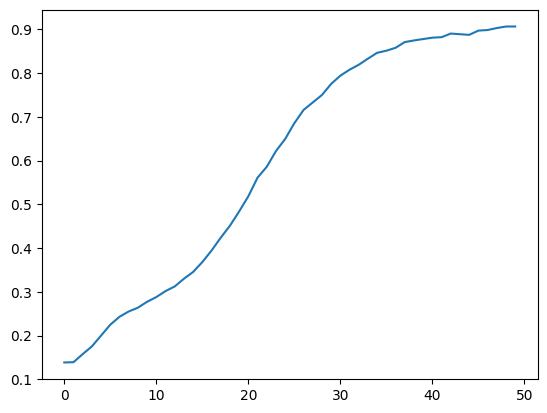

In [19]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'])

In [20]:
def predict_words(seed, no_words):
  for i in range(no_words):
    token_list = tokenizer.texts_to_sequences([seed])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_length-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=1)

    new_word = ''

    for word, index in tokenizer.word_index.items():
      if predicted == index:
        new_word = word
        break
    seed += " " + new_word
#     print(seed)
    if(i==no_words-1):
        return seed
    



In [31]:
seed_text = 'tree'
next_words = 8
sentence = predict_words(seed_text, next_words)
words = sentence.split()
reversed_sentence = " ".join(words[::-1])
print(reversed_sentence)


1/1 [==============================] - 0s 28ms/step
ideas can take root and grow like a tree


In [22]:
model.save('personification_generator.h5') # Will create a HDF5 file of the model

In [11]:
import pickle
with open('per_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [12]:
tokenizer.word_index
max_seq_length

NameError: name 'max_seq_length' is not defined